## MTX Hackathon


In [ ]:
from google.colab import drive
drive.mount("/content/rdrive")

Drive already mounted at /content/rdrive; to attempt to forcibly remount, call drive.mount("/content/rdrive", force_remount=True).


In [ ]:
%cd /content/rdrive/MyDrive/MTXhackathon/

/content/rdrive/MyDrive/MTXhackathon


### Data pre-processing

In [ ]:
#create dataframe containing name and label of the input files
import pandas as pd
import  os

train_df = pd.DataFrame() 
test_df = pd.DataFrame()

#array to store path of files and respective class 
path = []
label = []

base_dir = input("Enter Source folder containing class files")
folders = os.listdir(base_dir)


def export_csv():
  for folder in folders:
    count = 1
    print("Processing for %s.." %(folder))
    print("----------------------------")
    for files in os.listdir(os.path.join(base_dir,folder)):
      n = len(os.listdir(os.path.join(base_dir,folder)))
      path.append(files)
      label.append(folder)
      print("Processed %d out of %d" % (count, n))
      count +=1 
    print("----------------------------")
  if base_dir == 'hackolympics_data/Training_Data':
    train_df['File'] = path
    train_df['Class'] = label
    train_df.to_csv('train_dataset')
  else:
    test_df['File'] = path
    test_df['Class'] = label
    test_df.to_csv('test_dataset')

export_csv()

In [ ]:
import cv2
import numpy as np
import math
import pandas as pd
import os
import time


base_dir = 'hackolympics_data/Public_Test_Data/'
folder = 'TestData'

def video_capturing(data):
  for i in np.arange(len(data)):
    video_name = data.File[i]
    get_path = data.Class[i]
    video_path = os.path.join(os.path.join(base_dir,get_path), video_name)
    print(video_path)
    cap = cv2.VideoCapture(video_path)
    try:
      os.mkdir(folder)
    except:
      print("The folder already exists")
    train_file_name = os.path.join('/content/rdrive/MyDrive/MTXhackathon',folder)
    cap.set(cv2.CAP_PROP_FPS, 1)
    frameRate=cap.get(5)
    x=1
    count=1
    while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
        break
      if (frameId % math.floor(frameRate) == 0):
        filename ="%s_frame%d.jpg" % (video_name.split(".")[0], count)
        count+=1
        frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(train_file_name,filename), frame_grey)
        print(os.path.join(train_file_name,filename))
    cap.release()
    if i%30 == 0:
      time.sleep(5)
    print("%d done out of %d" %(i, len(data)))


data = pd.read_csv("test_dataset")
video_capturing(data)

In [ ]:
import shutil
import pandas as pd
import numpy as np

train_dir_path = "/content/rdrive/MyDrive/MTXhackathon/TrainData/"
# test_dir_path = "/content/rdrive/MyDrive/MTXhackathon/TestData/"

def split(dataset):
  data = pd.read_csv(dataset)
  for val in np.arange(data.shape[0]):
    try: 
      os.chdir('TrainData')
      os.mkdir('scoring')
      os.mkdir('Non-scoring')
    except:
      print("Folder already exists")
    video_name=data.File[val].split(".")[0]
    Class = data.Class[val]
    print(Class)
    if Class == 'scoring_clips':
      try:
        for frame in range(1,3):
          img_name = video_name+"_frame"+str(frame)+".jpg"
          source_file = os.path.join(train_dir_path, img_name)
          destination_file = os.path.join(os.path.join(train_dir_path, 'scoring'), img_name)
          shutil.move(source_file, destination_file)
          print(val, "out of ", data.shape[0] , "is down")
      except:
        print("already exists")
    else:
      try:
        for frame in range(1,3):
          img_name = video_name+"_frame"+frame+".jpg"
          source_file = os.path.join(train_dir_path, img_name)
          print(source_file)
          destination_file = os.path.join(os.path.join(train_dir_path, 'Non-scoring'), img_name)
          shutil.move(source_file, destination_file)
          print(val, "out of ", data.shape[0] , "is down")
      except:
        print("already exists")

split("/content/rdrive/MyDrive/MTXhackathon/train_dataset")

In [ ]:
import os
import shutil
import glob 

src = '/content/rdrive/MyDrive/MTXhackathon/TrainData/'
dest = "/content/rdrive/MyDrive/MTXhackathon/TrainData/Non-scoring"

for jpg in glob.iglob(os.path.join(src, "*.jpg")):
  shutil.move(jpg, dest)

###Image classification with tensorflow

In [ ]:
import pathlib 

data_dir = "/content/rdrive/MyDrive/MTXhackathon/TrainData"
data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/content/rdrive/MyDrive/MTXhackathon/TrainData


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3762


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height = 180
img_width = 180 
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3762 files belonging to 2 classes.
Using 3010 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3762 files belonging to 2 classes.
Using 752 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Non-scoring', 'scoring']


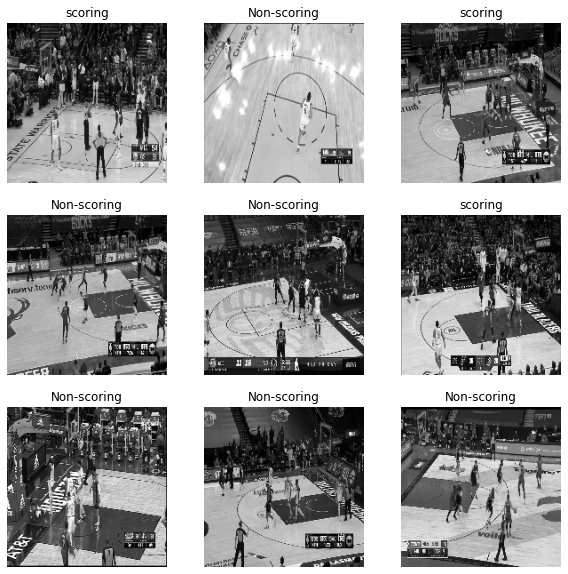

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 90, 90, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 45, 45, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 45, 45, 32)       

In [ ]:
epochs=150

models_dir = "model_param"
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/150
95/95 [==============================] - 3s 32ms/step - loss: 0.0144 - accuracy: 0.9897 - val_loss: 1.5005 - val_accuracy: 0.7261
Epoch 2/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0143 - accuracy: 0.9890 - val_loss: 1.5065 - val_accuracy: 0.7207
Epoch 3/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0143 - accuracy: 0.9900 - val_loss: 1.5178 - val_accuracy: 0.7181
Epoch 4/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0143 - accuracy: 0.9887 - val_loss: 1.5491 - val_accuracy: 0.7287
Epoch 5/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0145 - accuracy: 0.9900 - val_loss: 1.5712 - val_accuracy: 0.7301
Epoch 6/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0143 - accuracy: 0.9894 - val_loss: 1.5776 - val_accuracy: 0.7314
Epoch 7/150
95/95 [==============================] - 3s 31ms/step - loss: 0.0142 - accuracy: 0.9887 - val_loss: 1.5997 - val_accuracy: 0.7301
Epoch 

In [ ]:
model.save("my_model_250")

INFO:tensorflow:Assets written to: my_model_250/assets


In [ ]:
model.save("model_250.h5")

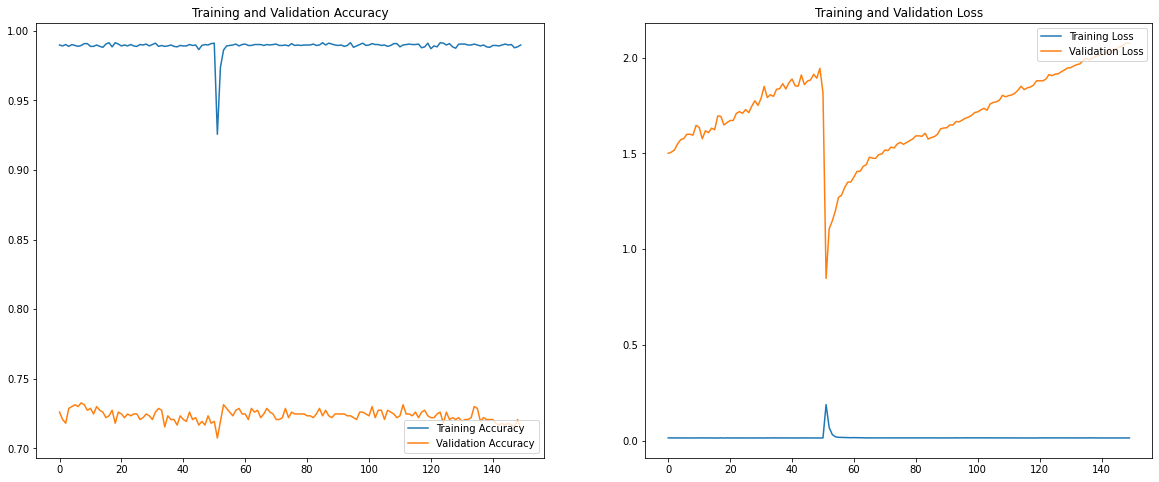

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_path = "/content/rdrive/MyDrive/MTXhackathon/TestData/clip_1000_frame1.jpg"

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Non-scoring with a 99.99 percent confidence.


In [ ]:
#predictions for public test data 
import pandas as pd

model = tf.keras.models.load_model('model_250.h5')
class_names = ['non_scoring_clips','scoring_clips']

image_folder =  "/content/rdrive/MyDrive/MTXhackathon/TestData"
img_height = 180 
img_width = 180

image_name = []
class_name = []

for image in os.listdir(image_folder):
  image_url = os.path.join(image_folder, image)
  img = tf.keras.utils.load_img(
    image_url, target_size=(img_height, img_width))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  image_name.append(image)
  class_name.append(class_names[np.argmax(score)])
  print("%s image is done" %image)

df = pd.DataFrame()
df['File'] = image_name
df['Class'] = class_name

df.to_csv('public_test_data')


clip_752_frame1.jpg image is done
clip_752_frame2.jpg image is done
clip_863_frame1.jpg image is done
clip_863_frame2.jpg image is done
clip_1027_frame1.jpg image is done
clip_1027_frame2.jpg image is done
clip_6_frame1.jpg image is done
clip_6_frame2.jpg image is done
clip_1440_frame1.jpg image is done
clip_1440_frame2.jpg image is done
clip_228_frame1.jpg image is done
clip_228_frame2.jpg image is done
clip_1286_frame1.jpg image is done
clip_1286_frame2.jpg image is done
clip_184_frame1.jpg image is done
clip_184_frame2.jpg image is done
clip_713_frame1.jpg image is done
clip_713_frame2.jpg image is done
clip_1184_frame1.jpg image is done
clip_1184_frame2.jpg image is done
clip_301_frame1.jpg image is done
clip_301_frame2.jpg image is done
clip_621_frame1.jpg image is done
clip_621_frame2.jpg image is done
clip_116_frame1.jpg image is done
clip_116_frame2.jpg image is done
clip_1293_frame1.jpg image is done
clip_1293_frame2.jpg image is done
clip_1436_frame1.jpg image is done
clip_14

In [ ]:
y_true = []
y_pred = []

groundtruth = pd.read_csv('test_dataset')
hypothesis = pd.read_csv('public_test_data')
d = { 'non_scoring_clips' : 1 , 'scoring_clips': 0}
length = groundtruth.shape[0] 

for iter in range(length):
  check_value = "%s_frame2.jpg" %(groundtruth.loc[iter][1].split(".")[0])
  index = hypothesis.index[hypothesis['File'] == check_value ].tolist()
  y_true.append(d[groundtruth.loc[iter][2]])
  y_pred.append(d[hypothesis.loc[index[0]][2]])
  print("Processing for %d image" %iter)

Processing for 0 image
Processing for 1 image
Processing for 2 image
Processing for 3 image
Processing for 4 image
Processing for 5 image
Processing for 6 image
Processing for 7 image
Processing for 8 image
Processing for 9 image
Processing for 10 image
Processing for 11 image
Processing for 12 image
Processing for 13 image
Processing for 14 image
Processing for 15 image
Processing for 16 image
Processing for 17 image
Processing for 18 image
Processing for 19 image
Processing for 20 image
Processing for 21 image
Processing for 22 image
Processing for 23 image
Processing for 24 image
Processing for 25 image
Processing for 26 image
Processing for 27 image
Processing for 28 image
Processing for 29 image
Processing for 30 image
Processing for 31 image
Processing for 32 image
Processing for 33 image
Processing for 34 image
Processing for 35 image
Processing for 36 image
Processing for 37 image
Processing for 38 image
Processing for 39 image
Processing for 40 image
Processing for 41 image
Pr

### Model evaluation

In [ ]:
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

print(auroc(y_true, y_pred))

tf.Tensor(0.6825601374570447, shape=(), dtype=float64)


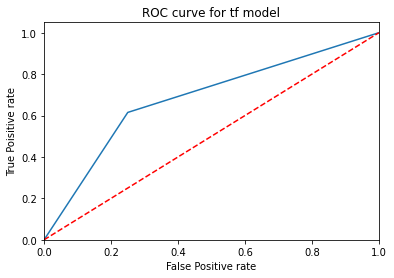

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_true, y_pred)
auc_Score = roc_auc_score(y_true, y_pred)
plt.plot(fpr, tpr, label="Model Sensitivity: %0.2f" %(auc_Score))
plt.plot([0,1], [0,1], 'r--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive rate")
plt.ylabel("True Poisitive rate")
plt.title("ROC curve for tf model")
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.75      0.66       208
           1       0.77      0.62      0.69       291

    accuracy                           0.67       499
   macro avg       0.68      0.68      0.67       499
weighted avg       0.69      0.67      0.67       499

